# Using rb_code Results with PyNorm

In [1]:
#use the rb_codes function to read in the data from the rb_codes pickle file
from pyNorm.io import read_rbcodes
from pyNorm.aod import pyn_batch
from pyNorm.aod import xlimit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#set up the datafile
file = 'Data/Spectrum_Analysis_z_0.7295715A.p'

## Because the information recorded in the pickle files is different than that of the inorm files, we need to specify a few additional values:

In [3]:
#set the position of the object
ra = 66.6391045
dec = -18.3566215

#set the ion that we are interested in. The pickle file contains all the ions that were measured in rb_codes and we want to look at one at a time
ion = 'MgII 2796'

#define a name for the target
tarname = 'HE1104_testgal'

#call the function to read in the data
spec = read_rbcodes(file,tarname,ra,dec,ion)

641.0141378534221 17.90429584213929 <class 'numpy.float64'>
2
1
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True  True]


## Spec object can now be used the same as the object returned by 'read_inorm'

## Check/Plot the Results:

In [4]:
#run pyn_batch to complete the calculation
spec_out = pyn_batch(spec)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True  True]
********** MgII 2796 2796 **********
pyn_batch: Wavelength = 2796.352
pyn_batch: f-value = 6.123e-01

Velocity range of integration: -615.9 <= v <= 6.2

--------------------------------------------
log N = 13.245 (-0.053, +0.047)
--------------------------------------------

--------------------------------------------
<v>       = -317.54  +/- 17.53
<b>       = 121.71  +/- 25.97
dv90      = 291.81  +/- 24.80
Skew      =   0.98  +/- 1.40
----------------

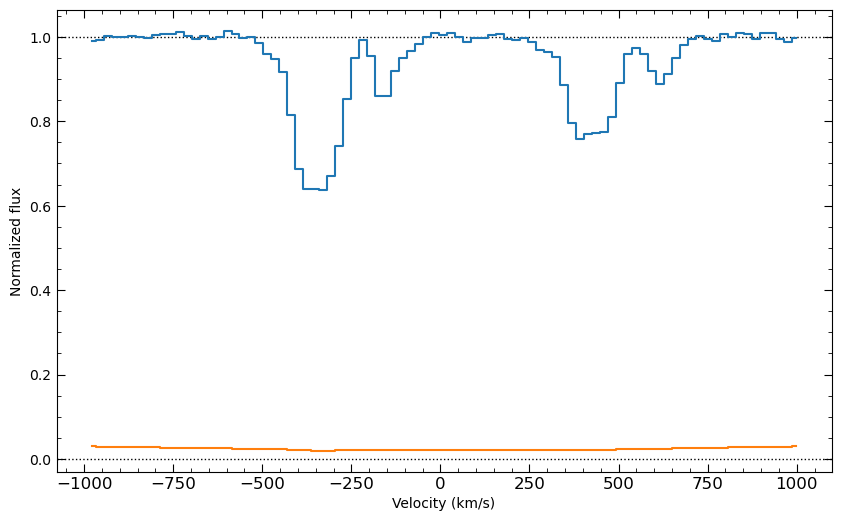

In [5]:
#plot the normalized spectrum and error
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(spec_out['vnorm'],spec_out['fnorm'],drawstyle='steps-mid')
plt.plot(spec_out['vnorm'],spec_out['fnorm_err'],drawstyle='steps-mid')

plt.axhline(0,linestyle=':',color='k',linewidth=1,zorder=0)
plt.axhline(1,linestyle=':',color='k',linewidth=1,zorder=0)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized flux');

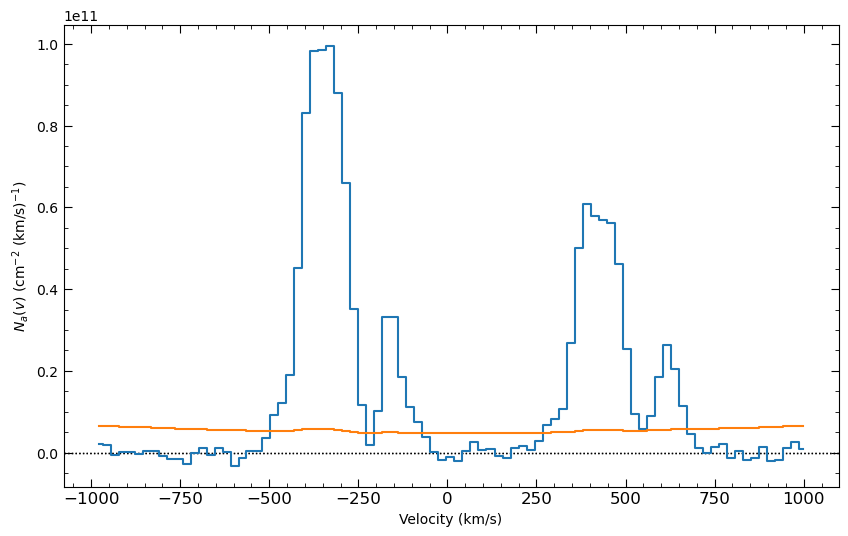

In [ ]:
#plot the column density profile

plt.figure(figsize=(10,6))
plt.plot(spec_out['vnorm'],spec_out['Nav'],drawstyle='steps-mid')
plt.plot(spec_out['vnorm'],spec_out['Nav_err'],drawstyle='steps-mid')

plt.axhline(0,linestyle=':',color='k',linewidth=1,zorder=0)
plt.axhline(1,linestyle=':',color='k',linewidth=1,zorder=0)
plt.xlabel('Velocity (km/s)')
plt.ylabel('$N_a(v)$ (cm$^{-2}$ (km/s)$^{-1}$)');

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True  True]


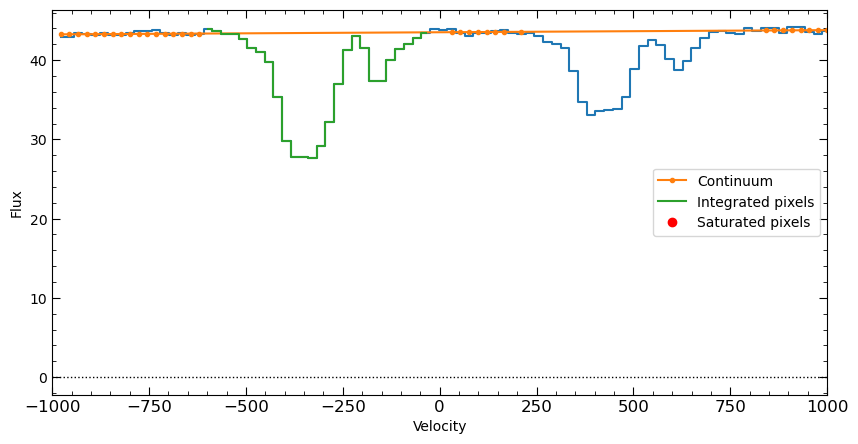

In [ ]:
#plot the pixels in the integration range and saturated pixels
idx = np.full(np.size(spec['vel']),False)
xlim1, xlim2 = \
    xlimit(spec['vel'],[spec['v1'],spec['v2']])
idx[xlim1:xlim2] = True

plt.figure(figsize=(10,5))
plt.xlim(-1000,1000)
plt.xlabel('Velocity')
plt.ylabel('Flux')

# Plot the spectrum
plt.plot(spec['vel'],spec['flux'],drawstyle='steps-mid')

# Plot the continuum
gd=spec['contin_mask_bool']#(spec['vel']>-250) & (spec['vel']<250) 
print(gd)
plt.plot(spec['vel'][gd],spec['contin'][gd],label='Continuum',marker='.')

# Overplot the integration range
plt.plot(spec['vel'][idx],spec['flux'][idx],drawstyle='steps-mid',
        label='Integrated pixels')

# Identify pixels that are definitively saturated. 
plt.plot(spec['vel'][spec['Nav_sat']],spec['flux'][spec['Nav_sat']],'or',
        label='Saturated pixels')

plt.axhline(0,linestyle=':',zorder=0,linewidth=1,color='k')

plt.legend();